In [91]:
import clean_data
import feature_selection as fs
import modeling_2 as model
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Clean Data

In [92]:
df = clean_data.runAll()

/Users/williamegan/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


# Feature Selection

In [120]:
target = 'MD_EARN_WNE_P6'
df_no_id = df.drop('UNITID', axis=1)

In [95]:
n_features_to_select = 20
sel1 = fs.F_REGRESSION
sel2 = fs.MUTUAL_REGRESSION

## Stage 1: F_Regression

In [96]:
#F-SELECTION
f_sel_df = fs.selectFeatures(df_no_id, target, n_features_to_select, sel1)

/Users/williamegan/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/williamegan/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/williamegan/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/williamegan/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/williamegan/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/williamegan/anaconda3/lib/python3.7/sit

### Sampling and Splitting the Data

In [97]:
#Sampling and Splitting for f_regression
train, test = model.sampling_data(f_sel_df)
x_train, y_train, x_test, y_test = model.split_data(train, test, target)

### Run Models 

Random Forest

In [98]:
est = 20
sel = model.RF

rf_feature_importance_f, rf_f, rf_preds = model.run_model(x_train, y_train, x_test, est, sel)

SVR

In [99]:
est = .01
sel = model.SV

svm, svr_preds = model.run_model(x_train, y_train, x_test, est, sel)

 Linear Regression

In [100]:
est = 0
sel = model.LINEAR_R

regr, linear_preds = model.run_model(x_train, y_train, x_test, est, sel)

Lasso Regression

In [101]:
est = 0
sel = model.LASSO_R

lasso, lasso_preds = model.run_model(x_train, y_train, x_test, est, sel)

In [102]:
#Save the f_reg predictions to some variables
f_sel_RF = rf_preds
f_sel_SVR = svr_preds
f_sel_Lin = linear_preds
f_sel_Lass = lasso_preds

## Stage 2: Mutual Regression

Run the above models again, with the exception of the one immediately above this cell. Instead, run the cell immediately below this one

In [103]:
#MUTUAL SELECTION
mut_sel_df = fs.selectFeatures(df_no_id, target, n_features_to_select, sel2)

/Users/williamegan/Desktop/education_project/College_Project/feature_selection.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  new_df[target] = merged_df_no_id[target]
/Users/williamegan/Desktop/education_project/College_Project/feature_selection.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  new_df['Year'] = merged_df_no_id['Year']


### Sampling and Splitting the Data

In [104]:
train, test = model.sampling_data(mut_sel_df)
x_train, y_train, x_test, y_test = model.split_data(train, test, target)

### Run Models

Random Forest

In [105]:
est = 20
sel = model.RF

rf_feature_importance, rf, rf_preds = model.run_model(x_train, y_train, x_test, est, sel)

SVR

In [106]:
est = .01
sel = model.SV

svm, svr_preds = model.run_model(x_train, y_train, x_test, est, sel)

Linear Regression

In [107]:
est = 0
sel = model.LINEAR_R

regr, linear_preds = model.run_model(x_train, y_train, x_test, est, sel)

Lasso Regression

In [108]:
est = 0
sel = model.LASSO_R

lasso, lasso_preds = model.run_model(x_train, y_train, x_test, est, sel)

In [109]:
#Save the Variables!
mut_sel_RF = rf_preds
mut_sel_SVR = svr_preds
mut_sel_Lin = linear_preds
mut_sel_Lass = lasso_preds

## Stage 3: Random Forest Feature Selection

In [110]:
rfe_feats = ['AGE_ENTRY', 'AVGFACSAL', 'DEP_INC_AVG', 'INC_PCT_LO', 'IND_INC_AVG',
       'IND_INC_PCT_LO', 'INEXPFTE', 'MD_FAMINC', 'PELL_EVER', 'UGDS',
       'UGDS_API', 'UGDS_ASIAN', 'UGDS_MEN', 'UGDS_WOMEN', 'DEG_ART',
       'DEG_PROF', 'DEG_HUM', 'DEG_MED', 'CONTROL_3.0', 'OPENADMP_0.0',
       'MD_EARN_WNE_P6', 'Year']

In [111]:
df_rfe = df[rfe_feats]

### Sampling and Splitting Data

In [112]:
train, test = model.sampling_data(df_rfe)
x_train, y_train, x_test, y_test = model.split_data(train, test, target)

### Run Models

Random Forest

In [113]:
est = 20
sel = model.RF

rf_feature_importance, rf_rfe, rf_preds = model.run_model(x_train, y_train, x_test, est, sel)

SVR

In [114]:
est = .01
sel = model.SV

svm, svr_preds = model.run_model(x_train, y_train, x_test, est, sel)

Linear Regression

In [115]:
est = 0
sel = model.LINEAR_R

regr, linear_preds = model.run_model(x_train, y_train, x_test, est, sel)

Lasso Regression

In [116]:
est = 0
sel = model.LASSO_R

lasso, lasso_preds = model.run_model(x_train, y_train, x_test, est, sel)

In [117]:
#Save the Variables!
rfe_sel_RF = rf_preds
rfe_sel_SVR = svr_preds
rfe_sel_Lin = linear_preds
rfe_sel_Lass = lasso_preds

### NOW, we compare each of these to the truth using MSE and find the smallest one.

In [118]:
from sklearn.metrics import mean_squared_error

In [173]:
#don't touch these guys
print(f_sel_df.columns)
print(mut_sel_df.columns)
print(df_rfe.columns)

Index(['DEP_INC_AVG', 'DEP_INC_PCT_LO', 'FIRST_GEN', 'INC_PCT_H2',
       'INC_PCT_LO', 'IND_INC_AVG', 'IND_INC_PCT_LO', 'MD_FAMINC',
       'PAR_ED_PCT_HS', 'PAR_ED_PCT_PS', 'PCTPELL', 'PELL_EVER', 'DEG_PROF',
       'PREDDEG_1', 'PREDDEG_3', 'CONTROL_3.0', 'HIGHDEG_4', 'ICLEVEL_1.0',
       'OPENADMP_1.0', 'OPENADMP_2.0', 'MD_EARN_WNE_P6', 'Year'],
      dtype='object')
Index(['DEPENDENT', 'DEP_INC_AVG', 'DEP_INC_PCT_LO', 'DEP_INC_PCT_M1',
       'DEP_STAT_PCT_IND', 'FIRST_GEN', 'HI_INC_DEBT_MDN', 'INC_PCT_H1',
       'INC_PCT_H2', 'INC_PCT_LO', 'INC_PCT_M2', 'IND_INC_AVG',
       'IND_INC_PCT_LO', 'IND_INC_PCT_M1', 'IND_INC_PCT_M2', 'MD_FAMINC',
       'MD_INC_DEBT_MDN', 'PAR_ED_PCT_HS', 'PAR_ED_PCT_PS', 'PELL_EVER',
       'MD_EARN_WNE_P6', 'Year'],
      dtype='object')
Index(['AGE_ENTRY', 'AVGFACSAL', 'DEP_INC_AVG', 'INC_PCT_LO', 'IND_INC_AVG',
       'IND_INC_PCT_LO', 'INEXPFTE', 'MD_FAMINC', 'PELL_EVER', 'UGDS',
       'UGDS_API', 'UGDS_ASIAN', 'UGDS_MEN', 'UGDS_WOMEN', 'DEG_AR

In [119]:
errs_dict = {}
errs_dict['f_sel_RF_err'] =  mean_squared_error(y_test, f_sel_RF ) 
errs_dict['f_sel_SVR_err'] = mean_squared_error(y_test, f_sel_SVR )
errs_dict['f_sel_Lin_err'] = mean_squared_error(y_test, f_sel_Lin )
errs_dict['f_sel_Lass_err'] = mean_squared_error(y_test, f_sel_Lass)

errs_dict['mut_sel_RF_err'] = mean_squared_error(y_test, mut_sel_RF )
errs_dict['mut_sel_SVR_err'] = mean_squared_error(y_test, mut_sel_SVR )
errs_dict['mut_sel_Lin_err'] = mean_squared_error(y_test, mut_sel_Lin )
errs_dict['mut_sel_Lass_err'] = mean_squared_error(y_test, mut_sel_Lass)


errs_dict['rfe_sel_RF'] = mean_squared_error(y_test, rfe_sel_RF)
errs_dict['rfe_sel_SVR'] = mean_squared_error(y_test, rfe_sel_SVR)
errs_dict['rfe_sel_Lin'] = mean_squared_error(y_test, rfe_sel_Lin)
errs_dict['rfe_sel_Lass'] = mean_squared_error(y_test, rfe_sel_Lass)


least_err = errs_dict['f_sel_RF_err']
for err in errs_dict:
    least_err = min(least_err, errs_dict[err])
    
winner = ''
for err in errs_dict:
    if errs_dict[err] == least_err:
        winner = err

print('The winner is... '+winner+'!!!! With a score of ', errs_dict[winner])

The winner is... rfe_sel_RF!!!! With a score of  0.0020051558128138577


In [122]:
for i in errs_dict:
    print(i, errs_dict[i])

f_sel_RF_err 0.0033464321984705845
f_sel_SVR_err 0.03685069906104381
f_sel_Lin_err 0.040758036185241646
f_sel_Lass_err 0.04080684717224371
mut_sel_RF_err 0.004378337556484133
mut_sel_SVR_err 0.04646553469774837
mut_sel_Lin_err 0.05304071809227701
mut_sel_Lass_err 0.05308251948442347
rfe_sel_RF 0.0020051558128138577
rfe_sel_SVR 0.026586707702449645
rfe_sel_Lin 0.0295521398554854
rfe_sel_Lass 0.029812816037565436


# Time for Tuning (we do this only for our favorite model)

## note that this is all for f_selec, assuming it is the best

In [163]:
target = 'MD_EARN_WNE_P6'
k=5
est_list = [10, 20, 30, 50, 100, 150]
error_metric = model.MSE
df_no_id = df.drop('UNITID', axis=1)


In [170]:
train, test = model.sampling_data(df_rfe)
x_train, y_train, x_test, y_test = model.split_data(train, test, target)

In [165]:
xval_errs = model.xValRF(x_train, y_train, target, k, est_list, error_metric)

est =  10 predicted on the  1 th fold!!
est =  20 predicted on the  1 th fold!!
est =  30 predicted on the  1 th fold!!
est =  50 predicted on the  1 th fold!!
est =  100 predicted on the  1 th fold!!
est =  150 predicted on the  1 th fold!!
est =  10 predicted on the  2 th fold!!
est =  20 predicted on the  2 th fold!!
est =  30 predicted on the  2 th fold!!
est =  50 predicted on the  2 th fold!!
est =  100 predicted on the  2 th fold!!
est =  150 predicted on the  2 th fold!!
est =  10 predicted on the  3 th fold!!
est =  20 predicted on the  3 th fold!!
est =  30 predicted on the  3 th fold!!
est =  50 predicted on the  3 th fold!!
est =  100 predicted on the  3 th fold!!
est =  150 predicted on the  3 th fold!!
est =  10 predicted on the  4 th fold!!
est =  20 predicted on the  4 th fold!!
est =  30 predicted on the  4 th fold!!
est =  50 predicted on the  4 th fold!!
est =  100 predicted on the  4 th fold!!
est =  150 predicted on the  4 th fold!!
est =  10 predicted on the  5 th

In [166]:
import numpy as np

In [167]:
means = []
for errs in xval_errs:
    means.append(np.mean(xval_errs[errs]) )
smol = min(means)

for k in xval_errs:
    if np.mean(xval_errs[k]) == smol:
        print(k)

150


In [169]:
for errs in xval_errs:
    print(xval_errs[errs])

[0.020741248800477955, 0.017789332188253862, 0.013619791892720164, 0.012046839392278285, 0.013569401307600286]
[0.01945679905599316, 0.016796647657174927, 0.012667203827509433, 0.01128627794670286, 0.012702448834411434]
[0.0188503749820056, 0.01622250467271599, 0.012766393417895695, 0.010752576865849846, 0.012380947912869417]
[0.018494279621344107, 0.01600918973264194, 0.012365369127899317, 0.010669250797025432, 0.012341967259395167]
[0.018389185503715755, 0.015800882039809852, 0.012164391673977289, 0.010442235561762445, 0.012012512043513985]
[0.018303733202979972, 0.015729679313075996, 0.012163624059677547, 0.010376950001181856, 0.011853488532968545]


WE HAVE concluded that the best number of estimators for Random Forest with this set of features is 150!!

We employ the `SHAP` additive explanation of the feaures. Talk about what this shows. 

In [171]:
#This is for running the optimally tuned random forest
est = 150
sel = model.RF

rf_feature_importance_f, rf, rf_preds = model.run_model(x_train, y_train, x_test, est, sel)

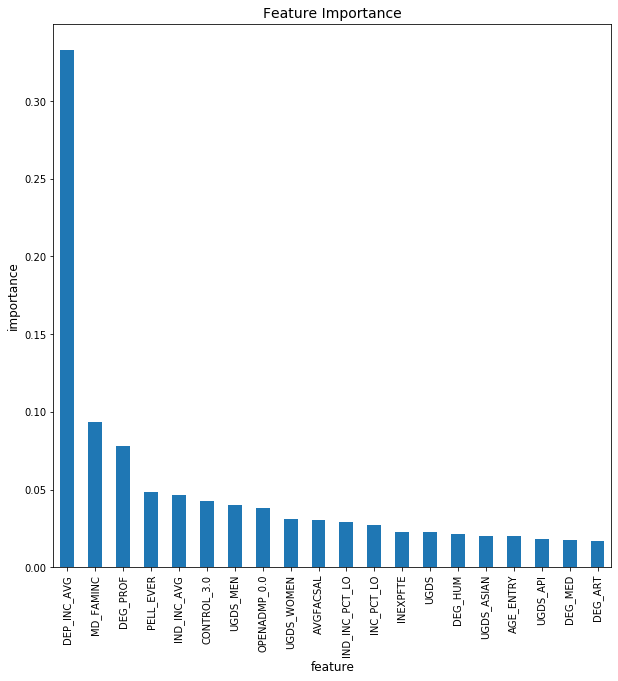

DEP_INC_AVG       0.333112
MD_FAMINC         0.093398
DEG_PROF          0.077933
PELL_EVER         0.048242
IND_INC_AVG       0.046264
CONTROL_3.0       0.042452
UGDS_MEN          0.039926
OPENADMP_0.0      0.038410
UGDS_WOMEN        0.030896
AVGFACSAL         0.030182
IND_INC_PCT_LO    0.029273
INC_PCT_LO        0.027388
INEXPFTE          0.022612
UGDS              0.022443
DEG_HUM           0.021379
UGDS_ASIAN        0.020080
AGE_ENTRY         0.020064
UGDS_API          0.017899
DEG_MED           0.017298
DEG_ART           0.016804
dtype: float64

In [182]:
model.graph_feature_importance(rf_feature_importance_f, x_train)

In [179]:
mean_squared_error(y_test, rf_preds)

0.0015880437090011956

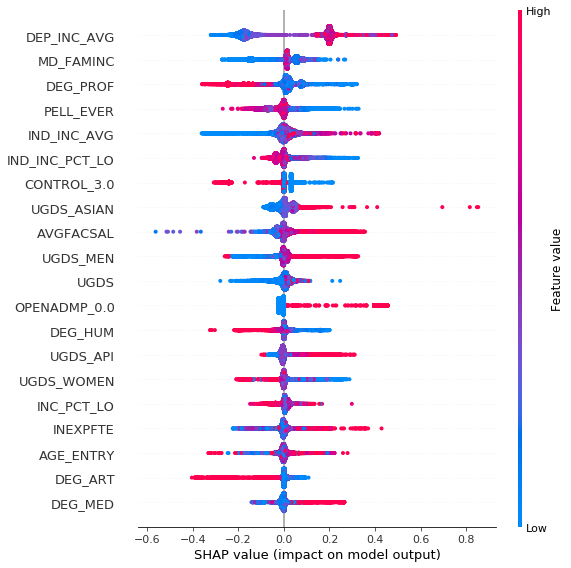

In [172]:
model.shap_summary_plot_for_Trees(rf, x_train)

 We will also note that there is possible data leakage between family income data going in to the model and income after words. We will try to optimize our model one last time by removing such data from the original frame, and selecting features based on that (with our favorite feature selection method) and run our favorite model on these new features, check the significance with shap again.

In [178]:
df_no_id

inc_list = df_no_id.filter(like='INC').columns.to_list()

df_no_id.drop(inc_list, axis=1)

,ADM_RATE,AGEGE24,AGE_ENTRY,AVGFACSAL,COSTT4_A,COSTT4_P,D150_4_AIANOLD,D150_4_HISPOLD,D150_L4_AIANOLD,D150_L4_HISPOLD,...,ICLEVEL_1.0,ICLEVEL_2.0,ICLEVEL_3.0,OPENADMP_0.0,OPENADMP_1.0,OPENADMP_2.0,OPENADMP_3.0,OPEFLAG_0.0,Year,MD_EARN_WNE_P6
0,-1.639374e+00,-2.428936e+00,-1.110862,-0.639116,0.000000,-1.404984e-15,-5.248629e-01,-6.301681e-01,0.000000,0.000000,...,1,0,0,0,0,1,0,1,2003,10.254144
1,9.608269e-01,-1.122806e+00,-0.618704,0.330194,0.000000,-1.404984e-15,1.629829e-01,-5.788934e-01,0.000000,0.000000,...,1,0,0,0,0,1,0,1,2003,10.442901
2,1.472615e+00,-1.029511e+00,-0.471110,0.064926,0.000000,-1.404984e-15,-6.629900e-02,-5.994033e-01,0.000000,0.000000,...,1,0,0,0,0,1,0,1,2003,10.529426
3,-1.215900e+00,-2.615526e+00,-1.171066,-0.624657,0.000000,-1.404984e-15,-6.395038e-01,-6.404230e-01,0.000000,0.000000,...,1,0,0,0,0,1,0,1,2003,10.085809
4,1.410360e+00,-2.522231e+00,-1.114716,0.228425,0.000000,-1.404984e-15,2.226520e+00,-4.455794e-01,0.000000,0.000000,...,1,0,0,0,0,1,0,1,2003,10.491274
5,1.285881e-14,6.497997e-01,0.238077,-1.081228,0.000000,-1.404984e-15,-1.018216e-16,1.457312e-16,-0.521445,-0.913625,...,0,1,0,0,1,0,0,1,2003,10.051908
6,1.285881e-14,1.676045e+00,1.123853,0.009315,0.000000,-1.404984e-15,-1.018216e-16,1.457312e-16,0.000000,0.000000,...,1,0,0,0,0,0,1,1,2003,10.494048
7,2.313047e+00,-8.429208e-01,-0.426630,-0.240381,0.000000,-1.404984e-15,-5.248629e-01,-6.096582e-01,0.000000,0.000000,...,1,0,0,0,0,1,0,1,2003,10.302264
8,7.516237e-01,-2.988707e+00,-1.340666,0.562094,0.000000,-1.404984e-15,1.424034e+00,-4.865991e-01,0.000000,0.000000,...,1,0,0,0,0,1,0,1,2003,10.589106
9,1.542108e+00,-3.361887e+00,-1.576697,-0.016266,0.000000,-1.404984e-15,-4.102219e-01,-6.404230e-01,0.000000,0.000000,...,1,0,0,0,0,1,0,1,2003,10.571317
